# Ejercicio 2

## Utilizar SVD y PCD para un conjunto de datos real, hacer la decomposición en componentes principales y realizar ejercicios.

### Bajar los datos con columnas [’target’,’columna1’, ’columna2’, . . ., ’columnaN’]
e.g. [’municipio’,’indicador uno’,’indicador dos’, ’indicador 20’]:

#### Se utilizan datos de encuesta real de Agosto 2020

Cargar libretas e importar datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('datos encuesta.csv')

In [20]:
df.head()

,CUARTO,BAÑO,TRABAJO,AUTO,TARGET
0,2,1,2,1,Bachillerato completo
1,2,1,2,1,Secundaria completa
2,4,2,3,2,Bachillerato completo
3,2,1,0,0,Primaria completa
4,2,1,2,1,Bachillerato completo


#### Explorar cuáles datos son numéricos

In [21]:
df.shape

(400, 5)

In [22]:
df.dtypes

CUARTO      int64
BAÑO        int64
TRABAJO     int64
AUTO        int64
TARGET     object
dtype: object

### Características a aplicarles PCA

In [26]:
features = ['CUARTO', 'BAÑO', 'TRABAJO','AUTO']

x = df.loc[:, features].values

### Separa Objetivo

In [27]:
y = df.loc[:,['TARGET']].values

### Estandarizar variables

In [28]:
x = StandardScaler().fit_transform(x)

### ¿Qué efecto hace la función StandardScaler a x? ¿Podrías explicarlo en términos de lo visto en álgebra lineal y estadístico?

Para efectos estadísticos lo que estamos haciendo es hacer que los datos tengan una distribución normal estándar con una media de 0 y una varianza de 1.

En terminos de algebra lineal estamos obteniendo la matriz de datos centrados.

### Dejemos que sklearn haga su trabajo, por ejemplo pidiéndole 2 componentes

In [38]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

### ¿Cuál es el máximo de componentes principales que puedo pedir?

n-1, en donde n es el número de variables que afectan el objetivo

### Dar forma al dataframe con los PCA

In [39]:
matrixComponents = pd.DataFrame(data = principalComponents, columns = ['Componente principal 1', 'Componente principal 2'])
print(matrixComponents)

     Componente principal 1  Componente principal 2
0                  0.090440               -0.280443
1                  0.090440               -0.280443
2                  4.138771                0.079018
3                 -1.838235                1.832345
4                  0.090440               -0.280443
..                      ...                     ...
395                3.342115               -0.151151
396                2.035991                0.744204
397                1.526524                1.869728
398                1.922907                0.836112
399               -0.419027                0.845082

[400 rows x 2 columns]


### ¿Cómo sé qué tantas componentes es pertinente tomar en cuenta para mis datos?

Dependiendo de qué tanto expliquen la varianza, es decir cuánto peso tengan en la misma.

### Usemos explainedvariance y explained_varianceratio para tratar de encontrar cuántos componentes ppales utilizar

[2.03 0.83]
[0.51 0.21]


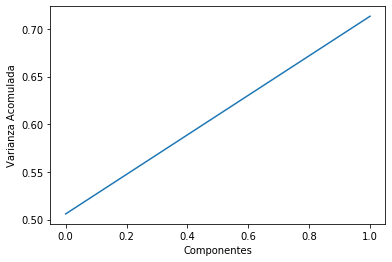

In [35]:
print(pca.explained_variance_.round(2))
print(pca.explained_variance_ratio_.round(2))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Componentes')
plt.ylabel('Varianza Acomulada');

### El primer componente explica el 70% de la varianza.